In [28]:
from proj_1_module import *
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

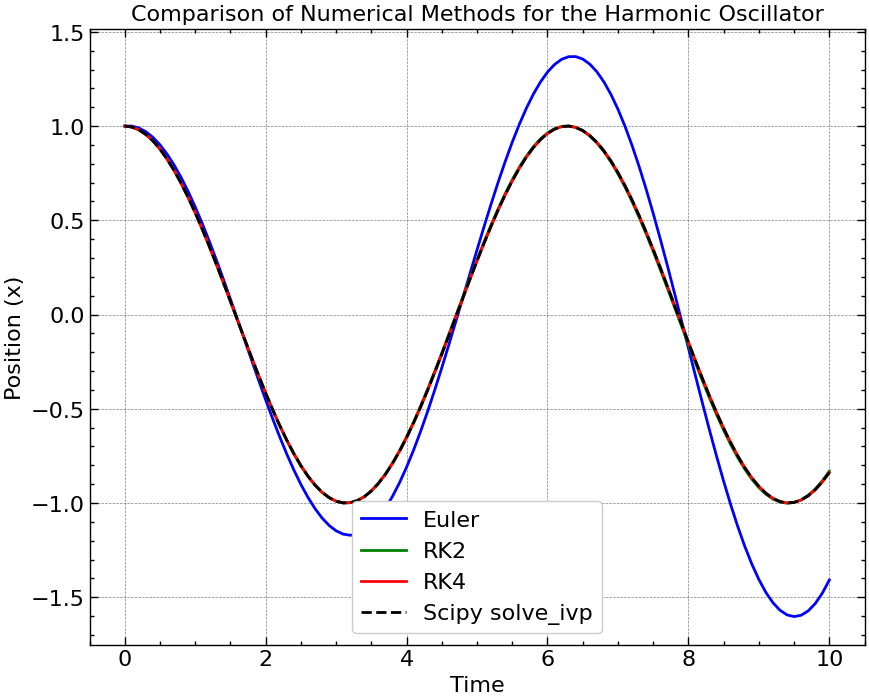

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def harmonic_oscillator(t, s):
    x, dx = s
    return np.array([dx, -x])

# Define parameters
t_0 = 0.0
s_0 = np.array([1.0, 0.0])  # Initial conditions: x = 1, dx/dt = 0
h = 0.1
N = 100

# Using the dynamics_solve function with different methods
T_euler, S_euler = dynamics_solve(harmonic_oscillator, D=2, s_0=s_0, h=h, N=N, method="Euler")
T_rk2, S_rk2 = dynamics_solve(harmonic_oscillator, D=2, s_0=s_0, h=h, N=N, method="RK2")
T_rk4, S_rk4 = dynamics_solve(harmonic_oscillator, D=2, s_0=s_0, h=h, N=N, method="RK4")

# Solving using scipy's solve_ivp for comparison
sol = solve_ivp(harmonic_oscillator, [t_0, t_0 + N * h], s_0, t_eval=np.linspace(t_0, t_0 + N * h, N + 1))

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(T_euler, S_euler[:, 0], 'b-', label='Euler')
plt.plot(T_rk2, S_rk2[:, 0], 'g-', label='RK2')
plt.plot(T_rk4, S_rk4[:, 0], 'r-', label='RK4')
plt.plot(sol.t, sol.y[0], 'k--', label='Scipy solve_ivp')
plt.title('Comparison of Numerical Methods for the Harmonic Oscillator')
plt.xlabel('Time')
plt.ylabel('Position (x)')
plt.legend()
plt.show()


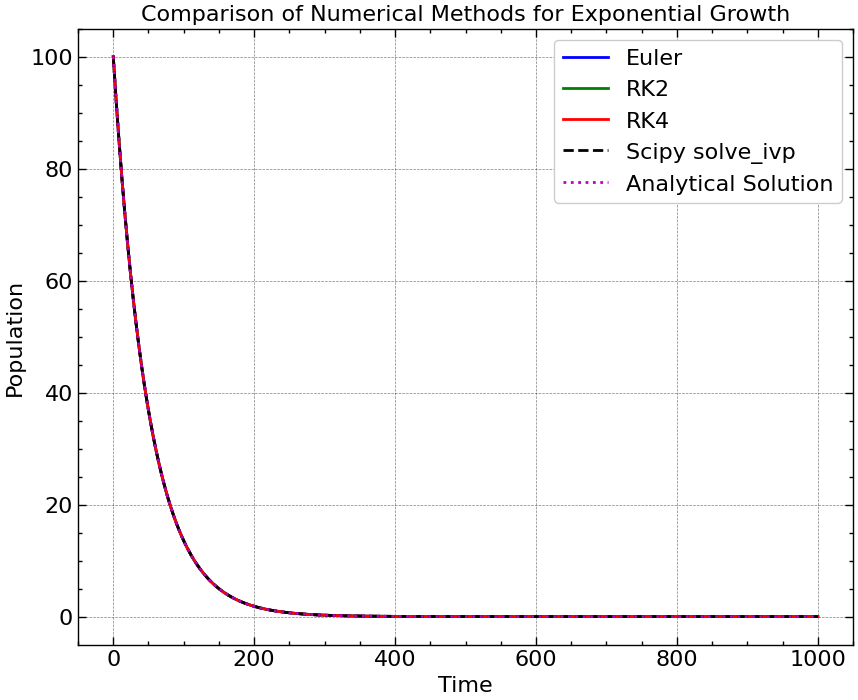

In [36]:
def exponential_growth(t, P):
    B = 0.1  # Birth rate
    D = 0.12  # Death rate
    return (B - D) * P

# Define parameters
t_0 = 0.0
P_0 = 100.0  # Initial population
h = 0.001
N = int(1e6)
r = 0.1 - 0.12  # r = B - D

# Using the dynamics_solve function with different methods
T_euler, P_euler = dynamics_solve(exponential_growth, D=1, s_0=P_0, h=h, N=N, method="Euler")
T_rk2, P_rk2 = dynamics_solve(exponential_growth, D=1, s_0=P_0, h=h, N=N, method="RK2")
T_rk4, P_rk4 = dynamics_solve(exponential_growth, D=1, s_0=P_0, h=h, N=N, method="RK4")

# Solving using scipy's solve_ivp for comparison
sol = solve_ivp(exponential_growth, [t_0, t_0 + N * h], [P_0], t_eval=np.linspace(t_0, t_0 + N * h, N + 1))

# Calculate analytical solution
T_analytical = np.linspace(t_0, t_0 + N * h, N + 1)
P_analytical = P_0 * np.exp(r * T_analytical)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(T_euler, P_euler, 'b-', label='Euler')
plt.plot(T_rk2, P_rk2, 'g-', label='RK2')
plt.plot(T_rk4, P_rk4, 'r-', label='RK4')
plt.plot(sol.t, sol.y[0], 'k--', label='Scipy solve_ivp')
plt.plot(T_analytical, P_analytical, 'm:', label='Analytical Solution')
plt.title('Comparison of Numerical Methods for Exponential Growth')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()
